<a href="https://colab.research.google.com/github/andreaeusebi/pytorch_for_deep_learning/blob/main/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Fundamentals Exercises

In [308]:
import torch
print(torch.__version__)

2.1.0+cu121


In [309]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula weight * X + bias).

Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [310]:
weight    = 0.3
bias      = 0.9

begin     = 0.0
end       = 1.0
step      = 0.02

X_dataset = torch.arange(begin, end, step).unsqueeze(dim=1)
y_dataset = weight * X_dataset + bias

print(f"X_dataset:\n {X_dataset[:10]}\nShape: {X_dataset.shape}")
print(f"y_dataset:\n {y_dataset[:10]}\nShape: {y_dataset.shape}")

X_dataset:
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Shape: torch.Size([50, 1])
y_dataset:
 tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])
Shape: torch.Size([50, 1])


Split the data into 80% training, 20% testing.

In [311]:
data_size = len(X_dataset)
print(f"data_size: {data_size}")

train_percent = 0.8
train_size = int(data_size * train_percent)
test_size = data_size - train_size

print(f"train_size: {train_size}")
print(f"test_size: {test_size}")

X_train = X_dataset[:train_size]
y_train = y_dataset[:train_size]

print(f"X_train:\n {X_train[:10]}\nShape: {X_train.shape}")
print(f"y_train:\n {y_train[:10]}\nShape: {y_train.shape}")

X_test = X_dataset[train_size:]
y_test = y_dataset[train_size:]

print(f"X_test:\n {X_test[:10]}\nShape: {X_test.shape}")
print(f"y_test:\n {y_test[:10]}\nShape: {y_test.shape}")


data_size: 50
train_size: 40
test_size: 10
X_train:
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Shape: torch.Size([40, 1])
y_train:
 tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])
Shape: torch.Size([40, 1])
X_test:
 tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
Shape: torch.Size([10, 1])
y_test:
 tensor([[1.1400],
        [1.1460],
        [1.1520],
        [1.1580],
        [1.1640],
        [1.1700],
        [1.1760],
        [1.1820],
        [1.1880],
        [1.1940]])
Shape: torch.Size([10, 1])


Plot the training and testing data so it becomes visual.

In [312]:
import matplotlib.pyplot as plt

In [313]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()

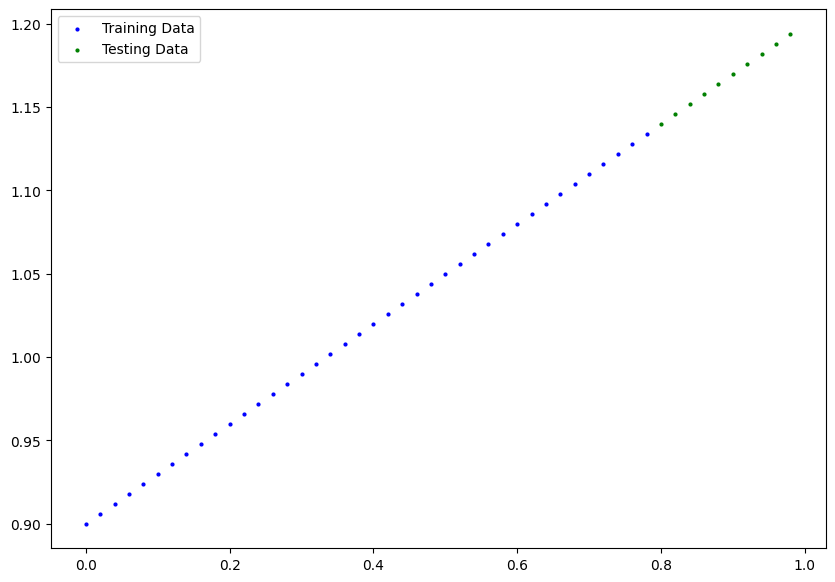

In [314]:
plot_prediction()

## 2. Build a PyTorch model by subclassing nn.Module.

Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

In [315]:
from torch import nn

In [316]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    ### METHOD WITH nn.Parameter() ###
    # self.weights = nn.Parameter(data=torch.randn(1),
    #                             requires_grad=True)

    # self.bias = nn.Parameter(data=torch.randn(1),
    #                          requires_grad=True)

    ### METHOD WITH nn.Linear() ###
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1,
                                  bias=True)


  def forward(self, x : torch.Tensor) -> torch.Tensor :
    ### METHOD WITH nn.Parameter() ###
    # return self.weight * x + self.bias

    ### METHOD WITH nn.Linear() ###
    return self.linear_layer(x)

Once you've constructed the model, make an instance of it and check its state_dict().

In [317]:
my_model = LinearRegressionModel()

print(my_model.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.0247]])), ('linear_layer.bias', tensor([0.8538]))])


In [318]:
# Check model device
print(next(my_model.parameters()).device)

my_model.to(device)

print(next(my_model.parameters()).device)
print(my_model.state_dict())

cpu
cuda:0
OrderedDict([('linear_layer.weight', tensor([[0.0247]], device='cuda:0')), ('linear_layer.bias', tensor([0.8538], device='cuda:0'))])


In [319]:
# Check device in which are stored the data
print(f"X_train device: {X_train.device}")
print(f"y_train device: {y_train.device}")
print(f"X_test device: {X_test.device}")
print(f"y_test device: {y_test.device}")

# Set all input data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

print(f"X_train device: {X_train.device}")
print(f"y_train device: {y_train.device}")
print(f"X_test device: {X_test.device}")
print(f"y_test device: {y_test.device}")

X_train device: cpu
y_train device: cpu
X_test device: cpu
y_test device: cpu
X_train device: cuda:0
y_train device: cuda:0
X_test device: cuda:0
y_test device: cuda:0


## 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

In [320]:
learning_rate = 0.01

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(my_model.parameters(),
                            lr=learning_rate)

In [321]:
# check prediction using initial random model parameters

# Turn model into evaluation mode
my_model.eval()

# Make predictions on the test data
with torch.inference_mode():
  pred_random = my_model(X_test)

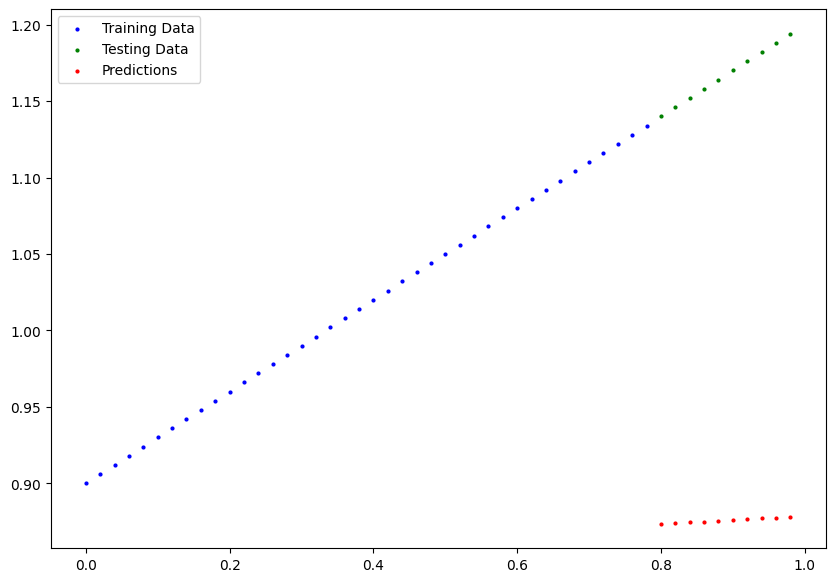

In [322]:
plot_prediction(predictions=pred_random.cpu())

Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.

In [323]:
epochs = 300

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  ### TRAINING ###
  my_model.train()

  y_pred = my_model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### TESTING ###
  my_model.eval() # turns off different settings in the model not needed for evaluation/testing

  with torch.inference_mode(): # turns off gradient tracking
    # 1. Forward pass
    test_pred = my_model(X_test)

    # 2. Calculate the loss on test data
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} | Params: {my_model.state_dict()}")

      # Record data
      epoch_count.append(epoch)
      loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())

Epoch: 0 | Loss: 0.15359066426753998 | Test loss: 0.27776816487312317 | Params: OrderedDict([('linear_layer.weight', tensor([[0.0286]], device='cuda:0')), ('linear_layer.bias', tensor([0.8638], device='cuda:0'))])
Epoch: 20 | Loss: 0.04181395098567009 | Test loss: 0.10846749693155289 | Params: OrderedDict([('linear_layer.weight', tensor([[0.0952]], device='cuda:0')), ('linear_layer.bias', tensor([0.9738], device='cuda:0'))])
Epoch: 40 | Loss: 0.03379100561141968 | Test loss: 0.07832729071378708 | Params: OrderedDict([('linear_layer.weight', tensor([[0.1336]], device='cuda:0')), ('linear_layer.bias', tensor([0.9698], device='cuda:0'))])
Epoch: 60 | Loss: 0.02691550925374031 | Test loss: 0.06246953085064888 | Params: OrderedDict([('linear_layer.weight', tensor([[0.1677]], device='cuda:0')), ('linear_layer.bias', tensor([0.9553], device='cuda:0'))])
Epoch: 80 | Loss: 0.02004859410226345 | Test loss: 0.04592490196228027 | Params: OrderedDict([('linear_layer.weight', tensor([[0.2020]], devi

## 4.Make predictions with the trained model on the test data.

Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

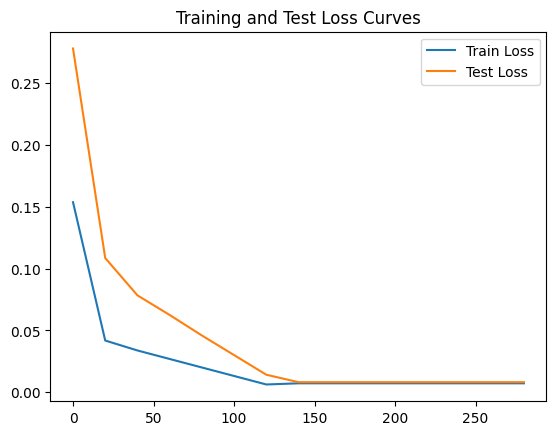

In [324]:
# Plot loss curves
plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.legend()

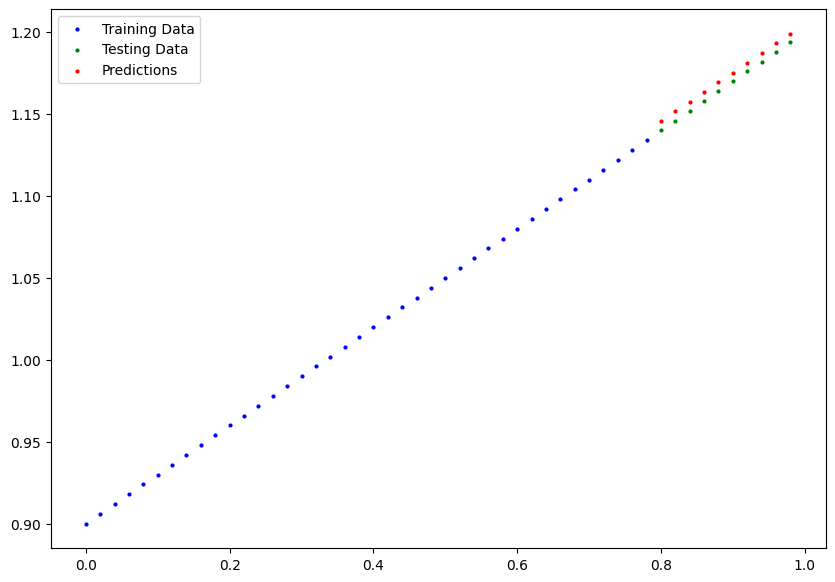

In [325]:
my_model.eval()
with torch.inference_mode():
  test_pred = my_model(X_test)

# Plot predictions
plot_prediction(predictions=test_pred.cpu())

## 5. Save your trained model's state_dict() to file.

In [327]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "my_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=my_model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/my_model.pth


Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

In [328]:
my_model2 = LinearRegressionModel()

In [330]:
my_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [332]:
print(f"Model 1 params:\n{my_model.state_dict()}")
print(f"Model 2 params:\n{my_model2.state_dict()}")

Model 1 params:
OrderedDict([('linear_layer.weight', tensor([[0.2961]], device='cuda:0')), ('linear_layer.bias', tensor([0.9088], device='cuda:0'))])
Model 2 params:
OrderedDict([('linear_layer.weight', tensor([[0.2961]])), ('linear_layer.bias', tensor([0.9088]))])


In [333]:
# load model 2 to cuda
my_model2.to(device)

print(f"Model 2 params:\n{my_model2.state_dict()}")

Model 2 params:
OrderedDict([('linear_layer.weight', tensor([[0.2961]], device='cuda:0')), ('linear_layer.bias', tensor([0.9088], device='cuda:0'))])


Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

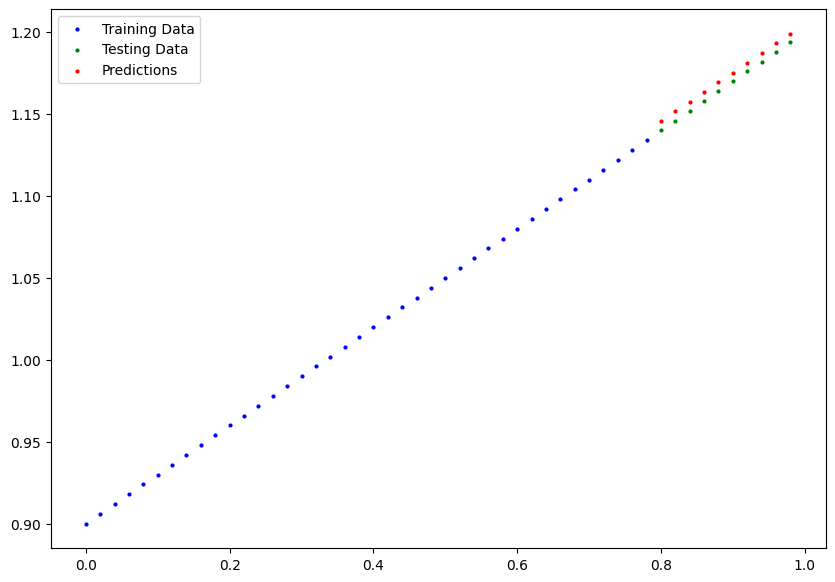

In [334]:
my_model2.eval()
with torch.inference_mode():
  model2_test_pred = my_model2(X_test)

# Plot predictions
plot_prediction(predictions=model2_test_pred.cpu())